## Multicollinearity 
Multicollinearity occurs in regression analysis when two or more independent variables are highly correlated with each other. This correlation can inflate the standard errors of the coefficient estimates, making it difficult to assess the individual impact of each variable on the dependent variable. As a result, multicollinearity can lead to unreliable and unstable estimates, complicating interpretation and prediction.

**Example of Multicollinearity**
Imagine you are building a linear regression model to predict house prices based on various features. Two of the independent variables you include are:

Square Footage - the total area of the house
Number of Bedrooms 
Number of Bathrooms

In many cases, larger houses (with more square footage) tend to have more bedrooms and bathrooms. Therefore, there is likely a strong correlation between these two variables. For example, you might find that:

- A house with 2,000 square feet often has 3 to 4 bedrooms.
- A house with 1,500 square feet may have 2 to 3 bedrooms.

Because of this correlation, if both variables are included in the regression model, it can become challenging to determine the individual contribution of square footage and the number of bedrooms to the house price. It directly impacts on linear model with:


* Inflated Standard Errors: The coefficients for square footage and the number of bedrooms may have large standard errors, making them statistically insignificant despite possibly being important predictors.

* Unstable Estimates: Small changes in the data can lead to large changes in the estimated coefficients, complicating predictions and interpretations.

* Interpretation Difficulty: It becomes challenging to say whether it’s the size of the house or the number of bedrooms driving the price up.

Consequently, this can result in misleading conclusions about the relationships among predictors and the outcome.

## Variance Inflation Factor
To diagnose multicollinearity, the Variance Inflation Factor (VIF) is commonly used. VIF quantifies how much the variance of a regression coefficient increases due to multicollinearity. High VIF values indicate problematic levels of correlation between independent variables, making it difficult to isolate their individual contributions.

VIF helps us decide whether to remove or combine variables for clearer interpretation. By addressing high VIF values, we can enhance the model's interpretability and performance. Strategies to mitigate multicollinearity include removing or combining correlated variables, leading to a more parsimonious model that is easier to interpret and more reliable in making predictions.

Additionally, understanding multicollinearity can guide the choice of modeling techniques as well. If multicollinearity is detected, Instead of Linear Regression, regularization methods like Ridge or Lasso regression may be considered. These techniques help mitigate the effects of correlated predictors, leading to more stable and interpretable models.

**How VIF is calculated?**

1. Run a regression for each independent variable $X_i$ as a dependent variable, using the other independent variables as predictors.

2. Obtain the R² value from each regression.

3. Calculate VIF using the formula:

    $VIF(X_i) = \frac{1}{1-R_i^2}$

    Where, $R_i^2$  is the R-squared value from the regression of $X_i$ on all other independent variables.

**Interpretation of VIF Values:**
* VIF = 1: No correlation between the independent variable and others.
* 1 < VIF < 5: Moderate correlation, generally acceptable.
* VIF ≥ 5 or 10: High correlation, indicating a potential multicollinearity problem. The threshold can vary, with some researchers suggesting different cutoffs.


**Addressing high VIF values**
1. Remove or combine correlated predictors.
2. Use techniques like principal component analysis (PCA) to reduce dimensionality.
Consider regularization methods like Ridge or Lasso regression.
3. Understanding and managing VIF helps improve the reliability of your regression model's estimates and interpretations.

Let's illustrate the concept through the use of toy dataset.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

In [5]:
# Generate a toy dataset
n = 100
X1 = np.random.normal(100, 10, n)  # Variable 1: e.g., Square Footage
X2 = X1 + np.random.normal(0, 5, n)  # Variable 2: e.g., Number of Bedrooms (highly correlated with X1)
X3 = np.random.normal(50, 5, n)     # Variable 3: e.g., Age of the house (less correlated)
# Dependent variable
y = 50000 + 300 * X1 + 200 * X3 + np.random.normal(0, 10000, n)  # Target: House Price

# Create DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

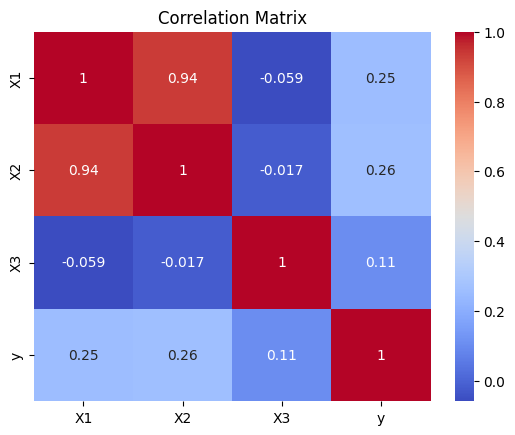

In [17]:
# Visualize the correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The above hitmap shows highest correlation between X1 and X2 variable confirming the presence of multicollinearity.

In [9]:
# Fit linear regression model
X = data[['X1', 'X2', 'X3']]
X_with_const = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(data['y'], X_with_const).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.878
Date:                Mon, 30 Sep 2024   Prob (F-statistic):             0.0400
Time:                        12:54:08   Log-Likelihood:                -1062.7
No. Observations:                 100   AIC:                             2133.
Df Residuals:                      96   BIC:                             2144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.18e+04   1.38e+04      3.743      0.0

In [12]:
# import vif from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(X_with_const)
print(vif_result)

  Feature         VIF
0   const  184.849331
1      X1    8.134389
2      X2    8.108936
3      X3    1.014891


This confirms the multicollinearity amongst `X1` and `X2`. As discussed above, we can decide on one among many options:
1. Remove one of the variables.
2. Combine both variables.
3. Use Regularized models like Lasso or Ridge Regression.
4. Use dimensionality reduction technique like PCA.
